# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

### 1.1 Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.

In [3]:
! git clone https://github.com/DS3001/linearRegression

Cloning into 'linearRegression'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 66 (delta 20), reused 11 (delta 11), pack-reused 37 (from 1)
Receiving objects: 100% (66/66), 2.64 MiB | 11.13 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('linearRegression/data/Q1_clean.csv')
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [6]:
df.loc[:,['Price','Neighbourhood '] ].groupby('Neighbourhood ').describe()

Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0

On average, Manhattan is the most expensive with an average price of around $184 per night.

In [8]:
df.loc[:,['Review Scores Rating','Neighbourhood '] ].groupby('Neighbourhood ').describe()

Review Scores Rating                                         \
                              count       mean       std   min   25%   50%   
Neighbourhood                                                                
Bronx                         217.0  91.654378  8.169239  60.0  88.0  93.0   
Brooklyn                     8487.0  92.363497  8.656563  20.0  90.0  94.0   
Manhattan                   11763.0  91.801496  8.840889  20.0  88.0  93.0   
Queens                       1590.0  91.549057  9.895860  20.0  88.0  94.0   
Staten Island                  96.0  90.843750  9.137923  40.0  87.0  92.0   

                              
                  75%    max  
Neighbourhood                 
Bronx            99.0  100.0  
Brooklyn        100.0  100.0  
Manhattan        99.0  100.0  
Queens          100.0  100.0  
Staten Island    97.0  100.0

On average, Brooklyn has the highest scores rating of 92.4.

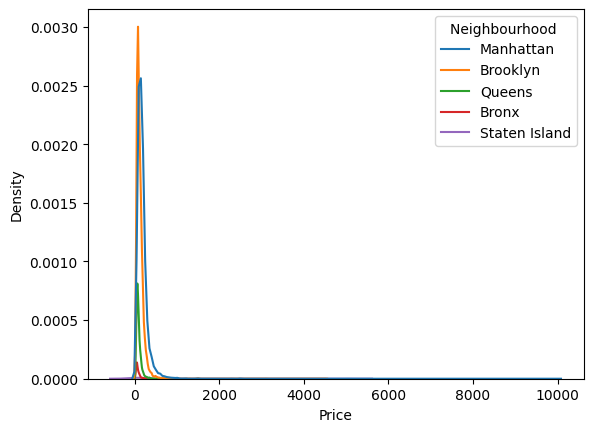

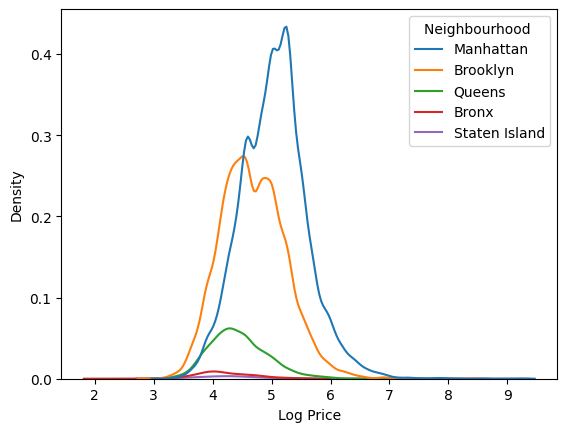

In [9]:
sns.kdeplot(x=df['Price'], hue=df['Neighbourhood '])
plt.show()

sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood '])
plt.xlabel("Log Price")
plt.show()

### 1.2 Regress price on Neighbourhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [11]:
from sklearn import linear_model

y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype = 'int')

reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


The mean price by borough for part 1 is the same as the coefficient in the regression for the same borough. This means that the regression simply calculates averages by group here. The coefficients in a regression of a continuous variable on one categorical variable are just the group mean.

### 1.3 Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [14]:
from sklearn import linear_model

y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int',  drop_first = True)

reg = linear_model.LinearRegression().fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


In [15]:
print(reg.intercept_)

75.27649769585331


You have to handle the creation of the dummies differently because you have to drop the first category (in this case the Bronx) because that becomes the reference category. The intercept is the coefficient for the Bronx which is its mean price ($75). The other coefficients in the new regression are relative to the Bronx. Since they are positive values, this represents how much greater their mean prices are than the Bronx. To get the coefficients in part 2, you can add the intercept to the new coefficient values.

### 1.4 Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood. What is the  𝑅2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [16]:
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

Z_train = pd.concat([X_train['Review Scores Rating'], pd.get_dummies(X_train['Neighbourhood '], dtype = 'int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], pd.get_dummies(X_test['Neighbourhood '], dtype = 'int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept = False).fit(Z_train, y_train)

y_hat = reg.predict(Z_test)
print('R^2: ', reg.score(Z_test, y_test))
rmse = np.sqrt(np.mean( (y_test - y_hat) ** 2))
print('RMSE: ', rmse)

R^2:  0.06701086106947296
RMSE:  125.01092061382933


In [17]:
results = pd.DataFrame({'variable': reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


The coefficient on Review Scores Rating is 1.03.

In [18]:
100 * 1.032257 + 89.421020

192.64672000000002

The most expensive kind of property to rent is a property in Manhattan with a rating of 100 since this would cost $192.65 per night.

### 1.5 Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood and Property Type. What is the  𝑅2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [20]:
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

Z_train = pd.concat([X_train['Review Scores Rating'], pd.get_dummies(X_train['Neighbourhood '], dtype = 'int'), pd.get_dummies(X_train['Room Type'], dtype = 'int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], pd.get_dummies(X_test['Neighbourhood '], dtype = 'int'), pd.get_dummies(X_test['Room Type'], dtype = 'int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept = False).fit(Z_train, y_train)

y_hat = reg.predict(Z_test)
print('R^2: ', reg.score(Z_test, y_test))
rmse = np.sqrt(np.mean( (y_test - y_hat) ** 2))
print('RMSE: ', rmse)

R^2:  0.22035348129282306
RMSE:  114.27692123130633


In [21]:
results = pd.DataFrame({'variable': reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


The coefficient on Review Scores Rating is 0.63.

In [22]:
0.626912 * 100 + 110.617820 + 53.693304

227.002324

The most expensive would be an entire home/apt in Manhattan with a review scores rating of 100 since this would be priced at $227 a night.

### 1.6 What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

The coefficient on Review Scores Rating changed from 1.03 in 4 to 0.63 in 5. The difference is that in part 4, room type was not included while in part 5, room type was included. Some of the variation in prices can be explained by room type which means that other variables like neighborhood and rating will have less predictive power themselves. Instead, their predictive power is reflected by the coefficients associated with room type which is why the coefficient for rating is lower.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

### 2.1 Load cars_hw.csv. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('linearRegression/data/cars_hw.csv')

In [158]:
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


<Axes: >

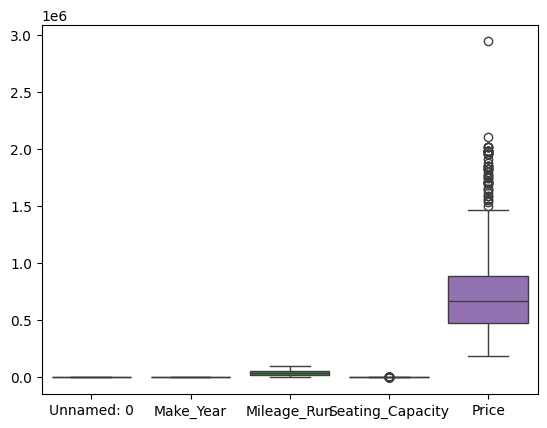

In [159]:
sns.boxplot(data=df)

In [160]:
df.describe()

,Unnamed: 0,Make_Year,Mileage_Run,Seating_Capacity,Price
count,976.000000,976.000000,976.000000,976.000000,9.760000e+02
mean,488.500000,2016.963115,41571.195697,5.095287,7.410195e+05
std,281.891232,2.818742,24390.995134,0.446224,3.673234e+05
min,1.000000,2011.000000,1117.000000,4.000000,1.880000e+05
25%,244.750000,2015.000000,22676.750000,5.000000,4.757500e+05
50%,488.500000,2017.000000,37570.500000,5.000000,6.665000e+05
75%,732.250000,2019.000000,57421.250000,5.000000,8.830000e+05
max,976.000000,2022.000000,99495.000000,8.000000,2.941000e+06


<Axes: >

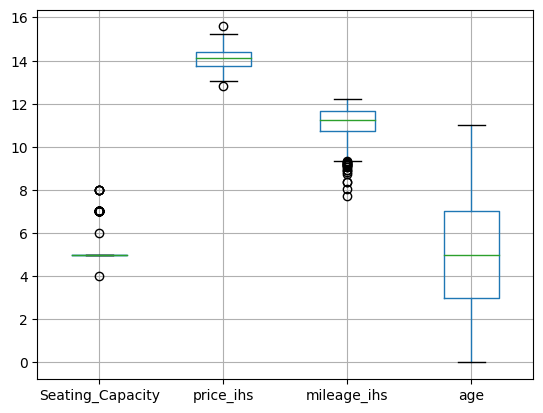

In [161]:
df['price_ihs'] = np.arcsinh(df['Price'])
df['mileage_ihs'] = np.arcsinh(df['Mileage_Run'])
df['age'] = max(df['Make_Year'])-df['Make_Year']
df = df.drop(['Unnamed: 0'],axis=1)
df[['Seating_Capacity', 'price_ihs', 'mileage_ihs', 'age']].boxplot()

### 2.2 Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

In [162]:
df['Price'].groupby(df['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


<Axes: xlabel='Price', ylabel='Density'>

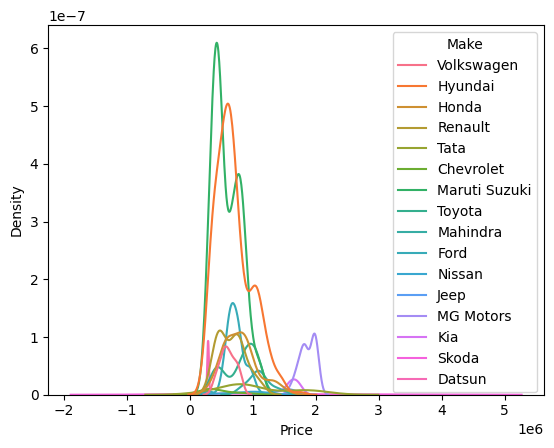

In [163]:
sns.kdeplot(data = df, x = 'Price', hue = 'Make')

In [164]:
df['price_ihs'].groupby(df['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,305.0,14.061658,0.398781,13.114331,13.785051,14.059241,14.330727,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.0,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


<Axes: xlabel='price_ihs', ylabel='Density'>

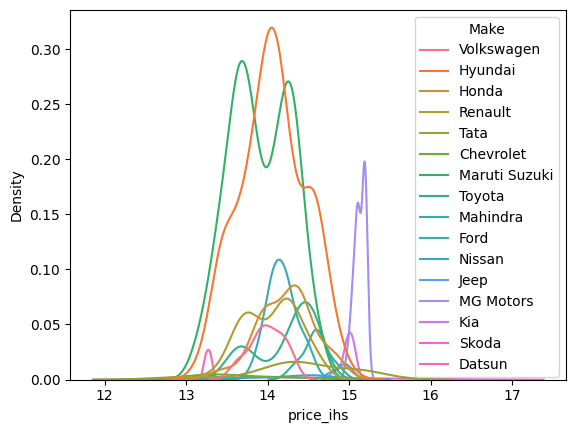

In [165]:
sns.kdeplot(data = df, x = 'price_ihs', hue = 'Make')

The most expensive car brand is MG Motors since the mean price is the greatest. Looking at the kernel density plot, MG motors has one big peak far to the right and not much at lower prices which further demonstrates it being the most expensive. The next most expensive are Kia and then Jeep. Generally, prices have one large peak at a specific price and then decrease going either way. This means that there is likely one "level" of car that is most commonly being sold by a particular car brand. Maruti Suzuki is different since it has two distinct peaks corresponding likely to two different tiers of cars offered.

In [166]:
df = df.drop(['Price','Mileage_Run','Make_Year'],axis=1)

### 2.3 Split the data into an 80% training set and a 20% testing set.

In [167]:
N = df.shape[0]
df = df.sample(frac=1, random_state=100)
train_size = int(.8*N)

df_train = df[0:train_size]
y_train = df_train['price_ihs']

df_test = df[train_size:]
y_test = df_test['price_ihs']

### 2.4 Make a model where you regress price on the numeric variables alone; what is the  𝑅2  and RMSE on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies(); be careful of the dummy variable trap); what is the  𝑅2  and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the  𝑅2  and RMSE on the test set? Does the joint model perform better or worse, and by home much?

In [170]:
# numeric

from sklearn import linear_model

var_n = ['age','mileage_ihs','Seating_Capacity']
X_train_n = df_train.loc[:,var_n]
reg_n = linear_model.LinearRegression().fit(X_train_n,y_train)
X_test_n = df_test.loc[:,var_n]
y_hat = reg_n.predict(X_test_n)
print('Numeric only Rsq: ', reg_n.score(X_test_n,y_test))
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numeric only RMSE: ', rmse_n)

Numeric only Rsq:  0.45254262356326824
Numeric only RMSE:  0.33392654735906463


In [171]:
# Categorical
var_cat = ['Make','Body_Type','Color','Fuel_Type','Transmission','Transmission_Type']

dummies = pd.DataFrame([])
for var in var_cat:
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)
    X_train_c = dummies.iloc[0:train_size,:]
    X_test_c = dummies.iloc[train_size:,:]

reg_c = linear_model.LinearRegression().fit(X_train_c,y_train)
y_hat_c = reg_c.predict(X_test_c)
print('Categorical only Rsq: ', reg_c.score(X_test_c,y_test))
rmse_c = np.sqrt( np.mean( (y_test - y_hat_c)**2 ))
print('Categorical only RMSE: ', rmse_c)

Categorical only Rsq:  0.6298129532407464
Categorical only RMSE:  0.27459106425227275


The categorical only model performs better than the numeric only model since it has a higher positive R^2 value and a lower RMSE.

In [172]:
# numeric and categorical
X_train_all = pd.concat([X_train_n, X_train_c],axis=1, ignore_index=True)
X_test_all = pd.concat([X_test_n, X_test_c],axis=1, ignore_index=True)

reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)
y_hat_all = reg_all.predict(X_test_all)
print('All Rsq: ', reg_all.score(X_test_all,y_test))
rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
print('All RMSE: ', rmse_all)

All Rsq:  0.7999206763763922
All RMSE:  0.20187237686198914


The joint model performs the best since it has an R^2 of 0.80 and an RMSE of 0.20. This has a significantly better R^2 and lower RMSE than the numeric model which had an R^2 of 0.45 and an RMSE of 0.33 as well as the categorical model which had an R^2 of 0.63 and an RMSE of 0.27. Thus, performance of the model is better when incorporating both numeric and categorical variables.

### 2.5 Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the  𝑅2  and RMSE change? At what point does  𝑅2  go negative on the test set? For your best model with expanded features, what is the  𝑅2  and RMSE? How does it compare to your best model from part 4?

In [173]:
from sklearn.preprocessing import PolynomialFeatures

for d in np.arange(1,5):
    expander = PolynomialFeatures(degree=d,include_bias=False)

    Z = expander.fit_transform(X_test_n)
    names = expander.get_feature_names_out()
    X_test_d = pd.DataFrame(data=Z, columns = names)
    Z = expander.fit_transform(X_train_n)
    names = expander.get_feature_names_out()
    X_train_d = pd.DataFrame(data=Z, columns = names)
    X_train_d.reset_index(drop=True, inplace=True)
    X_train_c.reset_index(drop=True, inplace=True)
    X_train_all = pd.concat([X_train_d, X_train_c], axis=1, ignore_index=True)

    X_test_d.reset_index(drop=True, inplace=True)
    X_test_c.reset_index(drop=True, inplace=True)
    X_test_all = pd.concat([X_test_d, X_test_c], axis=1, ignore_index=True)

    reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)
    print(d, ' Rsq: ', reg_all.score(X_test_all,y_test))
    y_hat_all = reg_all.predict(X_test_all)
    rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
    print(d, 'RMSE: ', rmse_all)

1  Rsq:  0.7999206763763922
1 RMSE:  0.20187237686198914
2  Rsq:  0.8025408094604635
2 RMSE:  0.2005462138908579
3  Rsq:  0.7996599800454635
3 RMSE:  0.20200385035775245
4  Rsq:  -5077888181.655391
4 RMSE:  32160.097581097867


The best is degree 2 since this has the greatest R^2 and the lowest RMSE. As you increase or decrease the degree of expansion The best model with degree 2 has R^2 0.80 and RMSE 0.20 which is better than the best joint model from part 4 which had a lower R^2 and higher RMSE.

### 2.6 For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

<Axes: xlabel='price_ihs'>

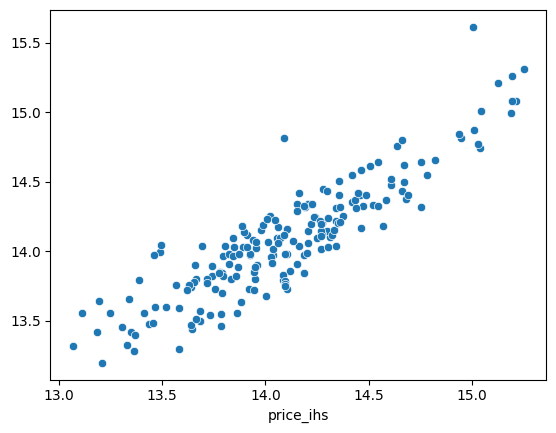

In [174]:
d = 2

expander = PolynomialFeatures(degree=d,include_bias=False)
Z = expander.fit_transform(X_test_n)
names = expander.get_feature_names_out()
X_test_d = pd.DataFrame(data=Z, columns = names)

Z = expander.fit_transform(X_train_n)
names = expander.get_feature_names_out()
X_train_d = pd.DataFrame(data=Z, columns = names)

X_train_d.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_d, X_train_c], axis=1)
X_train_all.columns = X_train_all.columns.astype(str)

X_test_d.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_d, X_test_c], axis=1)
X_test_all.columns = X_test_all.columns.astype(str)

reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)

y_hat_all = reg_all.predict(X_test_all)
residuals = y_test - y_hat_all

sns.scatterplot(x=y_test,y=y_hat_all)

The predicted and true values line up well against the diagonal. As test data increases, predictions increase appropriately.

<Axes: xlabel='price_ihs', ylabel='Density'>

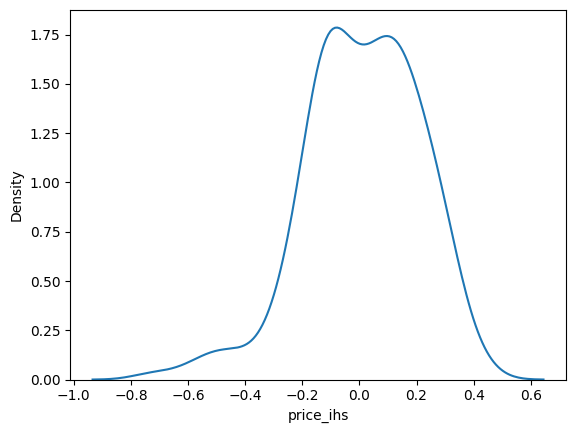

In [175]:
sns.kdeplot(residuals)

The residual kernal density plot does not look perfectly bell shaped but it is very close. The data has 2 main peaks in a hump shape near -0.2 and 0.2, but this can essentially be considered as one central peak since they are very minor. Otherwise, the plot is symmetric and relatively bell shaped about 0.

My model seems relatively strong because it has an R^2 of 0.80 which is pretty good and demonstrates moderate predictive capability. This indicates that the features selected represent a decent amount of variation in the data which allows for the model to appropriately fit both the train and test data. However, there is still room for improvement since the R^2 could definitely be hire if a different set of variables had been selected.